# Phase Retrieval of 3D Images  
Jack Greisman  
March 7, 2018

In [13]:
# Setup Notebook
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_context("notebook", font_scale=1.5)
import numpy as np
import phase_mixing_utils
import phase_retrieval
from scipy import stats

Our test data is going to be a single 3D Gaussian

In [15]:
# 3D Gaussian
x, y, z = np.mgrid[0.0:1.0:50j, 0.0:1.0:50j, 0.0:1.0:50j]
xyz = np.column_stack([x.flat, y.flat, z.flat])

mu = np.array([0.5, 0.5, 0.5])

sigma = np.array([.2, .1, .1])
covariance = np.diag(sigma**2)

gauss3d = stats.multivariate_normal.pdf(xyz, mean=mu, cov=covariance)

# Reshape back to a (30, 30) grid.
gauss3d = gauss3d.reshape(x.shape)

# Normalize
gauss3d = (gauss3d - gauss3d.min()) / (gauss3d.max() - gauss3d.min())

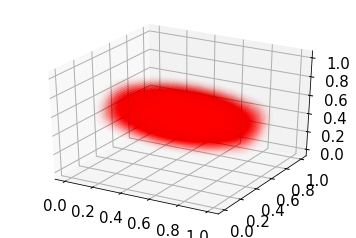

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgba_colors = np.zeros((125000,4))
# for red the first column needs to be one
rgba_colors[:,0] = 1.0
# the fourth column needs to be your alphas
rgba_colors[:, 3] = gauss3d.flatten()

ax.scatter3D(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=rgba_colors)
plt.show()

In [17]:
gauss3dfft = np.fft.fftn(gauss3d)
mags = phase_mixing_utils.get_mag(gauss3dfft)

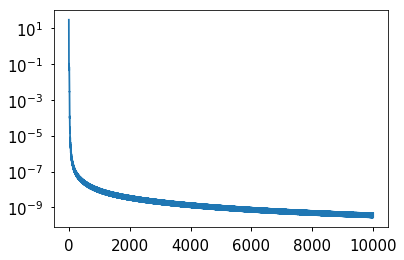

In [20]:
kstrack, errtrack = phase_retrieval.inputoutput(mags, n_iters=10000)
plt.semilogy(errtrack)

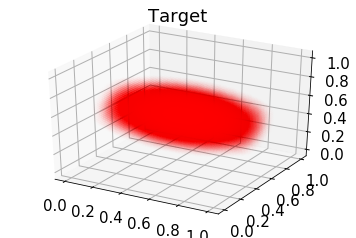

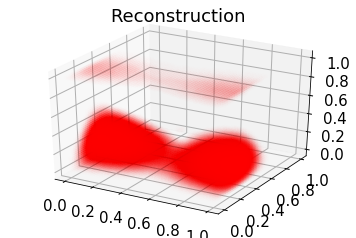

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
rgba_colors = np.zeros((125000,4))
# for red the first column needs to be one
rgba_colors[:,0] = 1.0
# the fourth column needs to be your alphas
rgba_colors[:, 3] = gauss3d.flatten()
ax.scatter3D(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=rgba_colors)
ax.set_title("Target")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
rgba_colors = np.zeros((125000,4))
# for red the first column needs to be one
rgba_colors[:,0] = 1.0
# the fourth column needs to be your alphas
rgba_colors[:, 3] = kstrack[-1].flatten()
ax.set_title("Reconstruction")
ax.scatter3D(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=rgba_colors)
plt.show()

This seems to be working pretty well